In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch import nn
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:\\Datasets\\Walmart_Sales\\Walmart Data Analysis and Forcasting.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
df.shape

(6435, 8)

In [6]:
df['Date'].tail()

6430    28-09-2012
6431    05-10-2012
6432    12-10-2012
6433    19-10-2012
6434    26-10-2012
Name: Date, dtype: object

In [7]:
df['Store'].nunique()
# This is to indicate that the data was collected from 45 walmart stores between February 2010 and October 2012(2 years)

45

In [8]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

# General Statistical Information

In [9]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [10]:
corr = df.corr()
corr

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [11]:
# Creating a Model that generates plots for us : using OOP concepts and seaborn+matplotlib

class Plot():
    """Args :
    df (DataFrame) : This is the name of the dataframe under study
    x : This is the independent variable (a good example is time)
    y : This is the dependent variable or column in our dataframe
     The choice of the plot to use or the variable to use depends on the user , statistical knowledge us critical
     
     Returns :
      Histogram plot or Line Plot depending on the number of variables """
    def __init__(self,df):
        self.df = df
    def histogram(self,x):
        fig =plt.figure(figsize=(20,8))
        sns.histplot(x=x,data=df)
        plt.ylabel("total")
        plt.title(f"A Histogram of {x} column")
        plt.show()
    def line(self,x,y):
        fig =plt.figure(figsize=(20,8))
        sns.lineplot(x=x,y=y,data=df)
        plt.ylabel("total")
        plt.title(f"A Line plot of  {y} column over time")
        plt.show()
    def joint(self,x,y):
        fig =plt.figure(figsize=(20,8))
        sns.jointplot(x=x,y=y,data=df)
        plt.ylabel("total")
        plt.title(f"A Joint of  {y} column over time")
        plt.show()

In [12]:
help(Plot(df))

Help on Plot in module __main__ object:

class Plot(builtins.object)
 |  Plot(df)
 |  
 |  Args :
 |  df (DataFrame) : This is the name of the dataframe under study
 |  x : This is the independent variable (a good example is time)
 |  y : This is the dependent variable or column in our dataframe
 |   The choice of the plot to use or the variable to use depends on the user , statistical knowledge us critical
 |   
 |   Returns :
 |    Histogram plot or Line Plot depending on the number of variables
 |  
 |  Methods defined here:
 |  
 |  __init__(self, df)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  histogram(self, x)
 |  
 |  joint(self, x, y)
 |  
 |  line(self, x, y)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [13]:
plots = Plot(df)

# DATA ANALYSIS ::

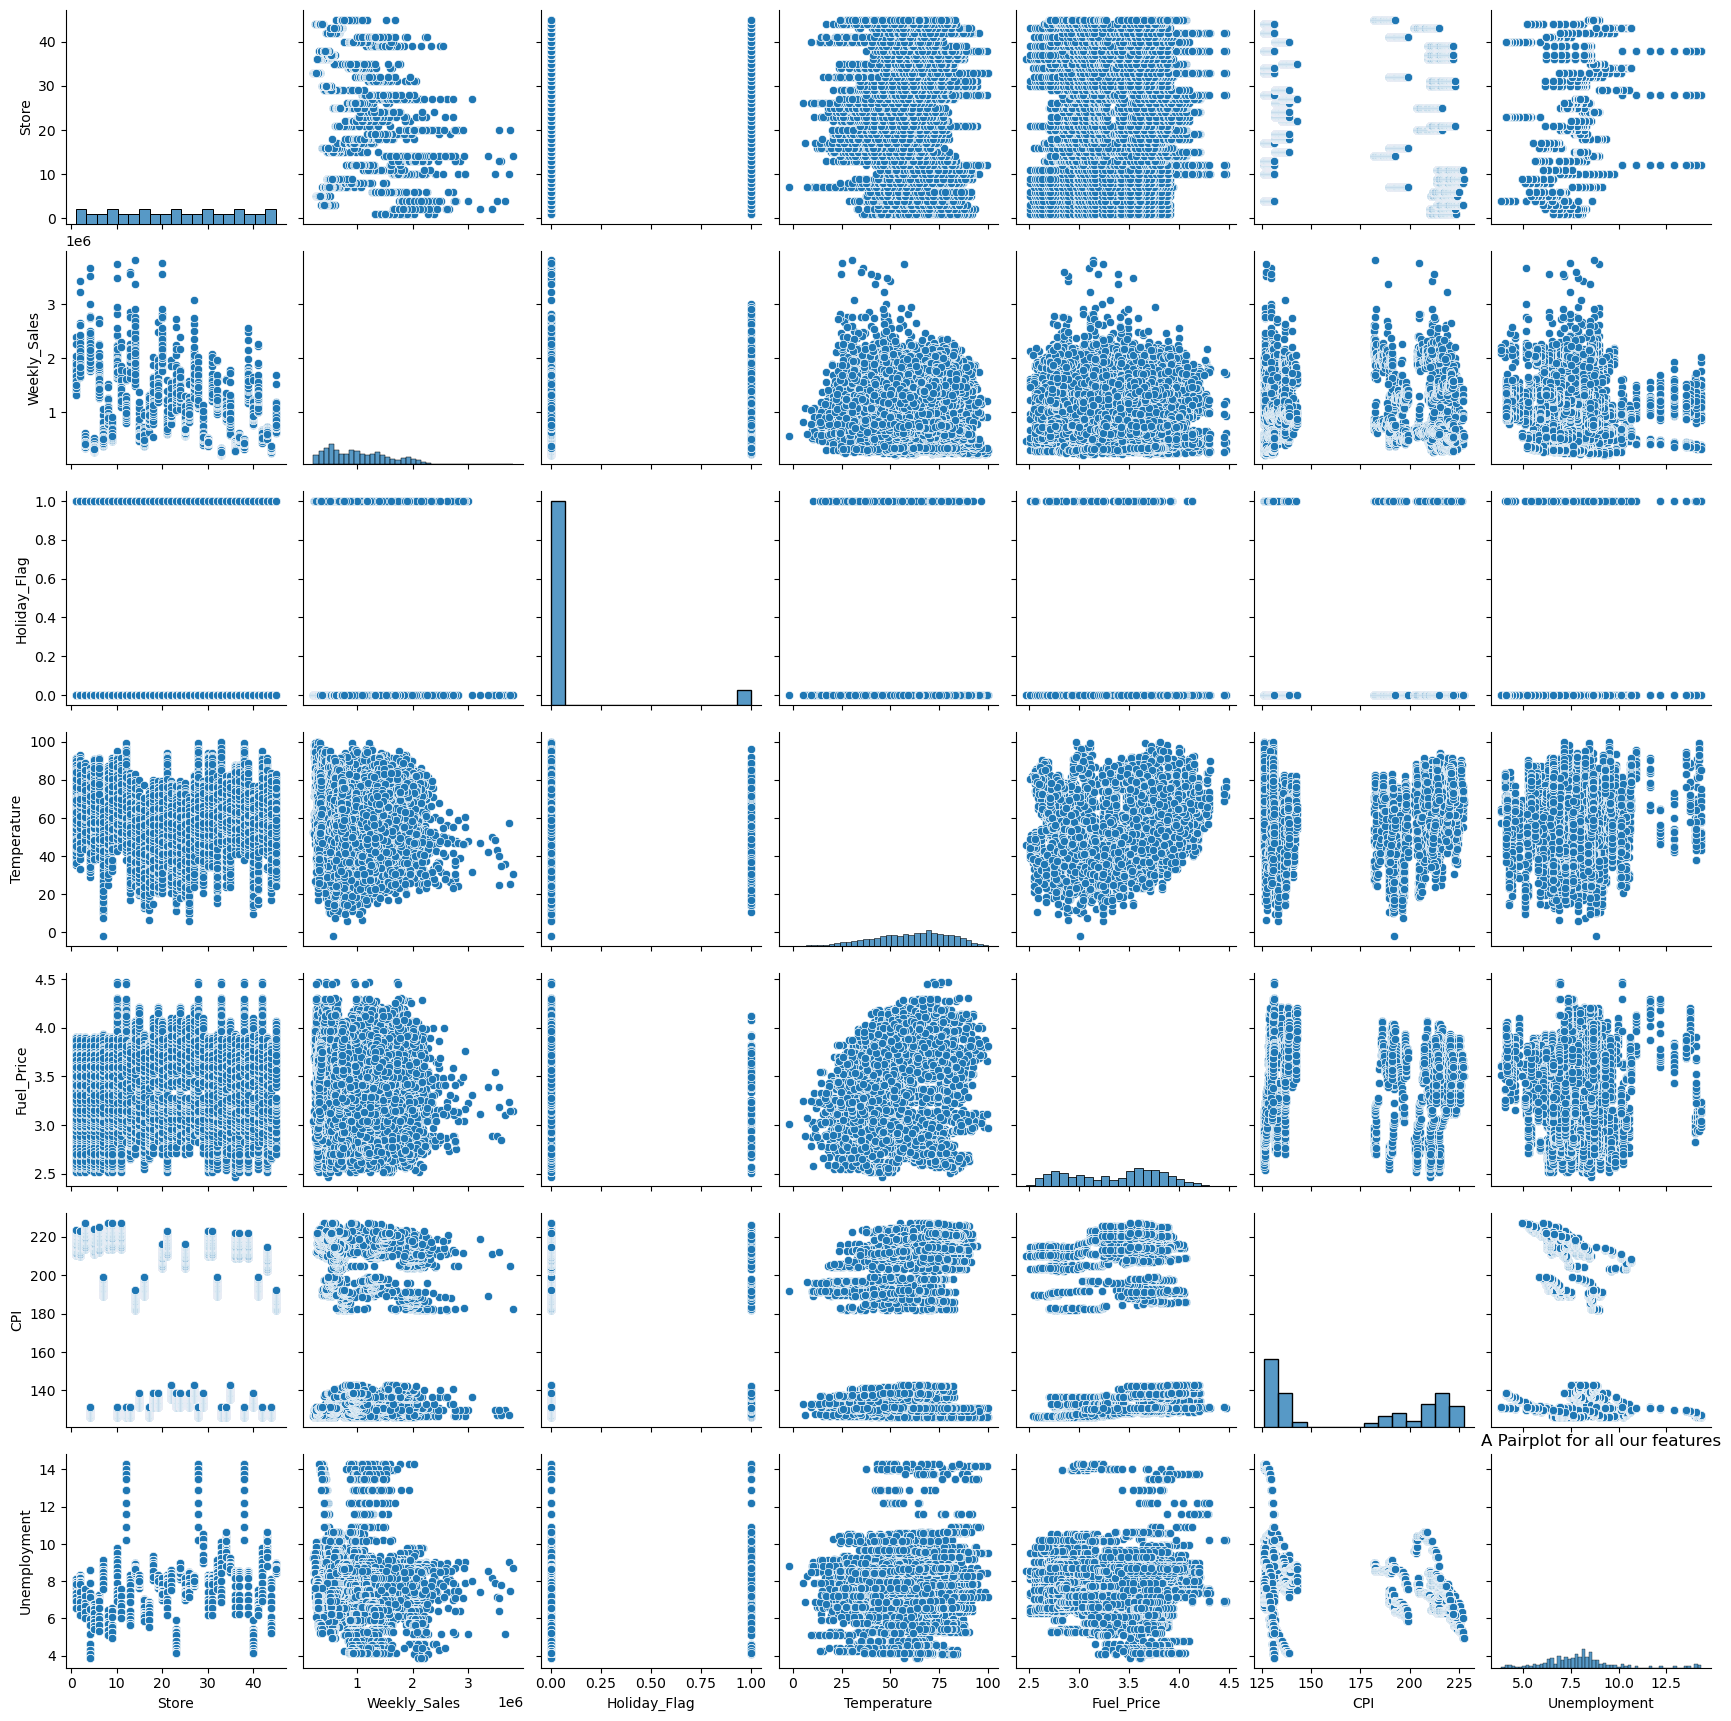

In [14]:
sns.pairplot(df)
plt.title("A Pairplot for all our features")
plt.show()

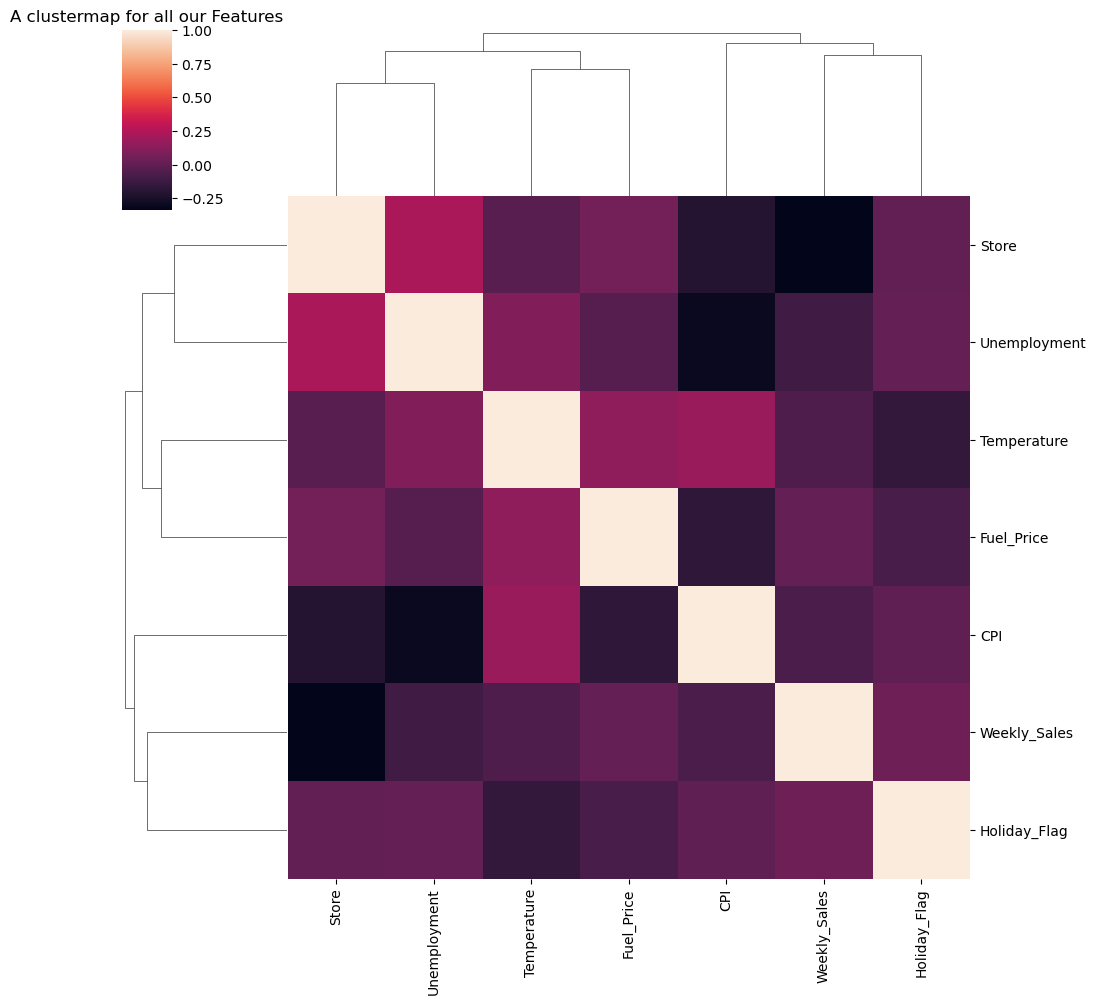

In [15]:
sns.clustermap(corr)
plt.title('A clustermap for all our Features')
plt.show()

In [16]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

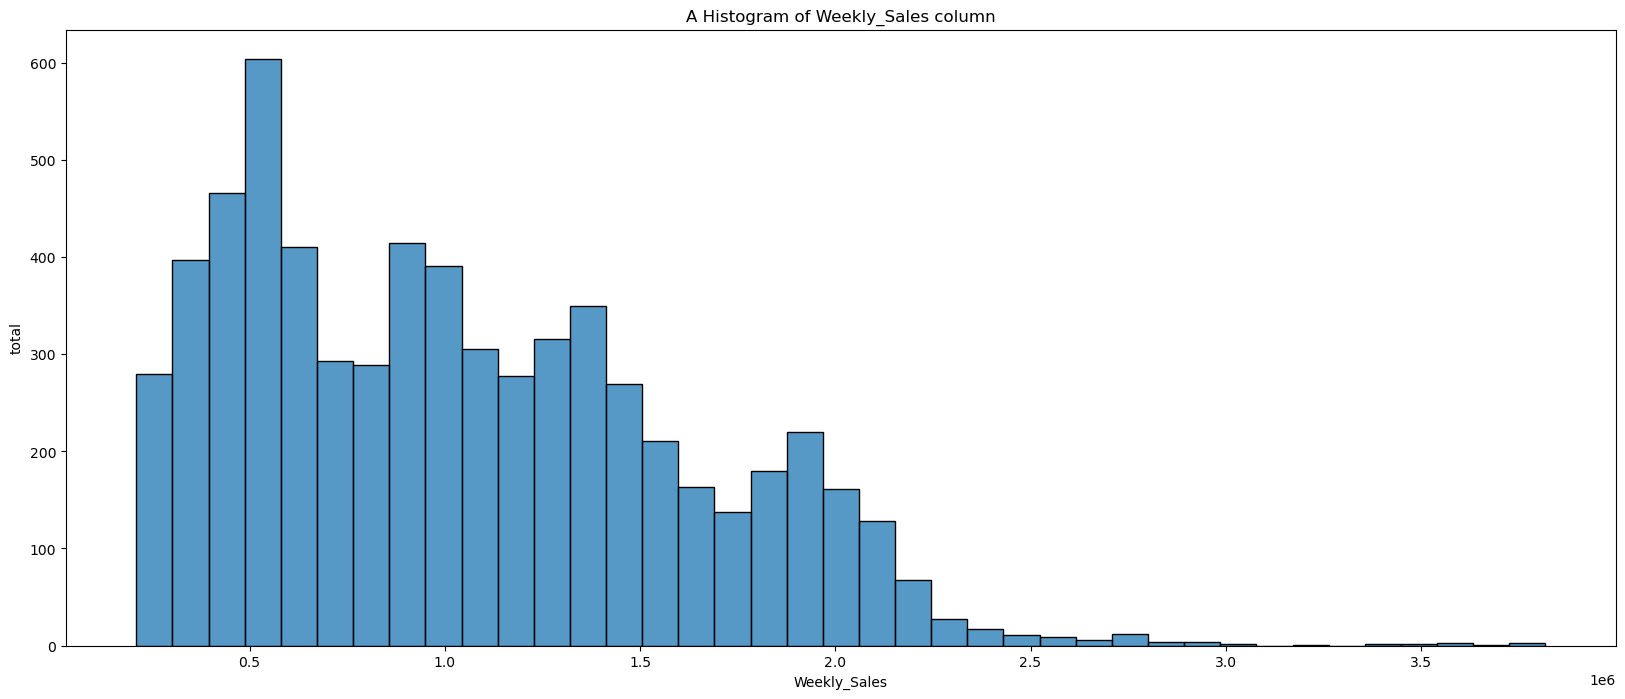

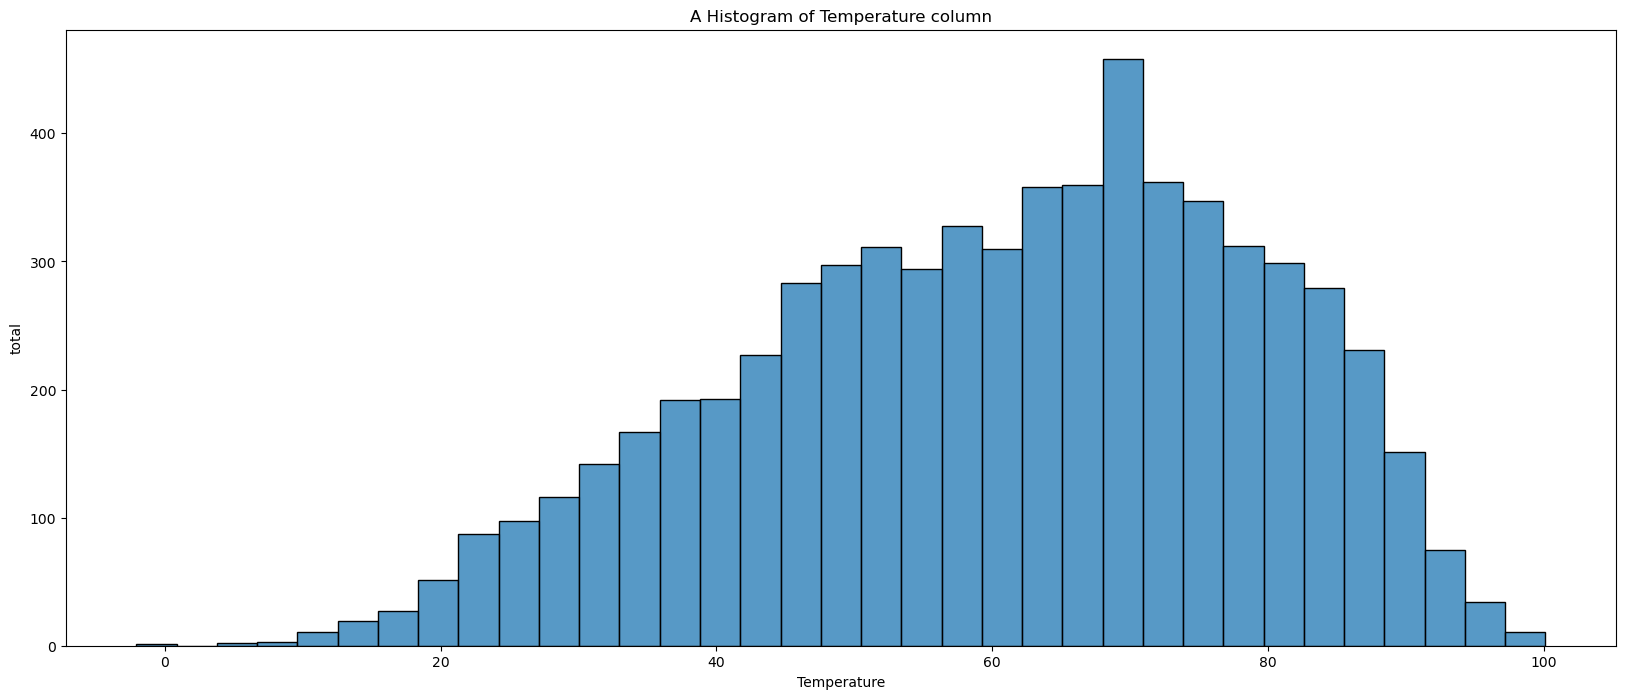

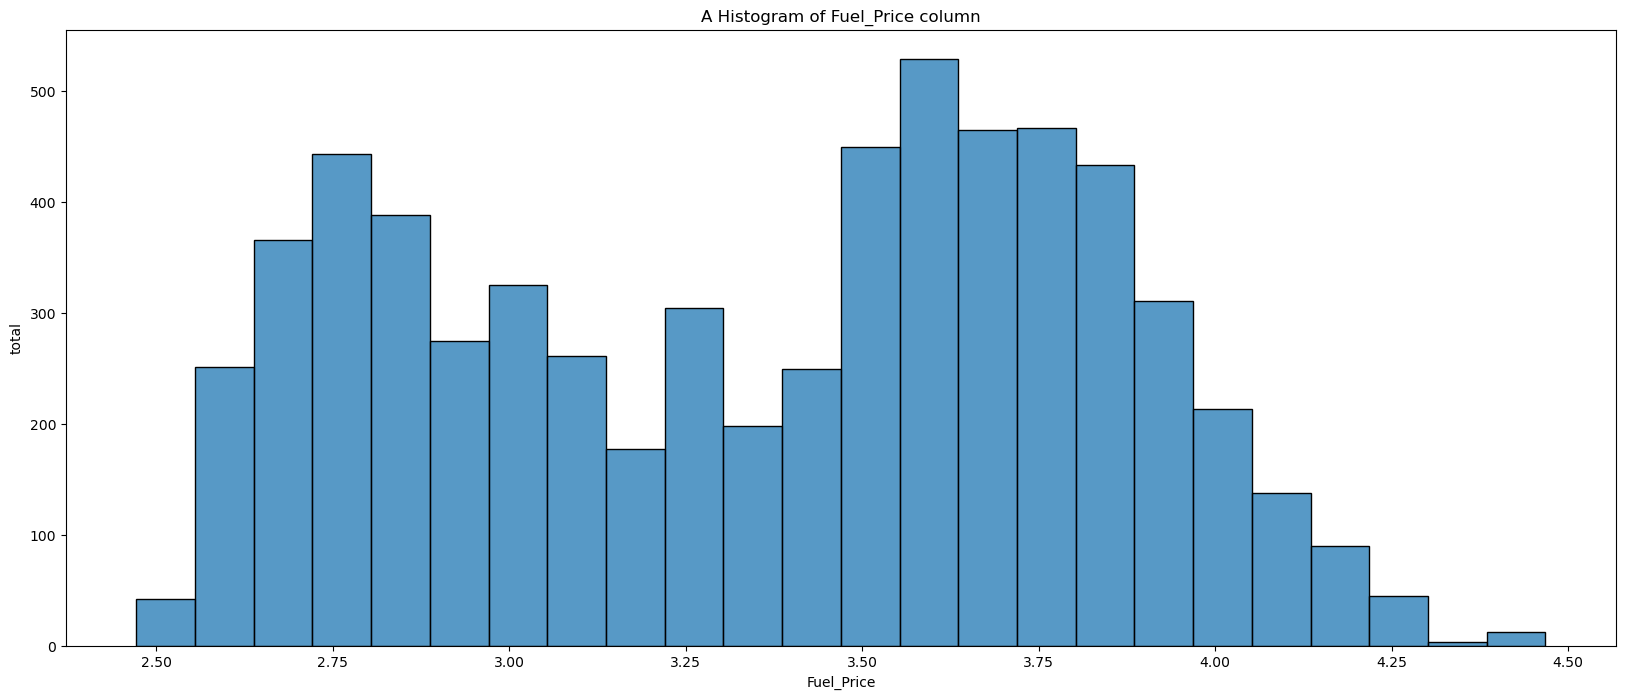

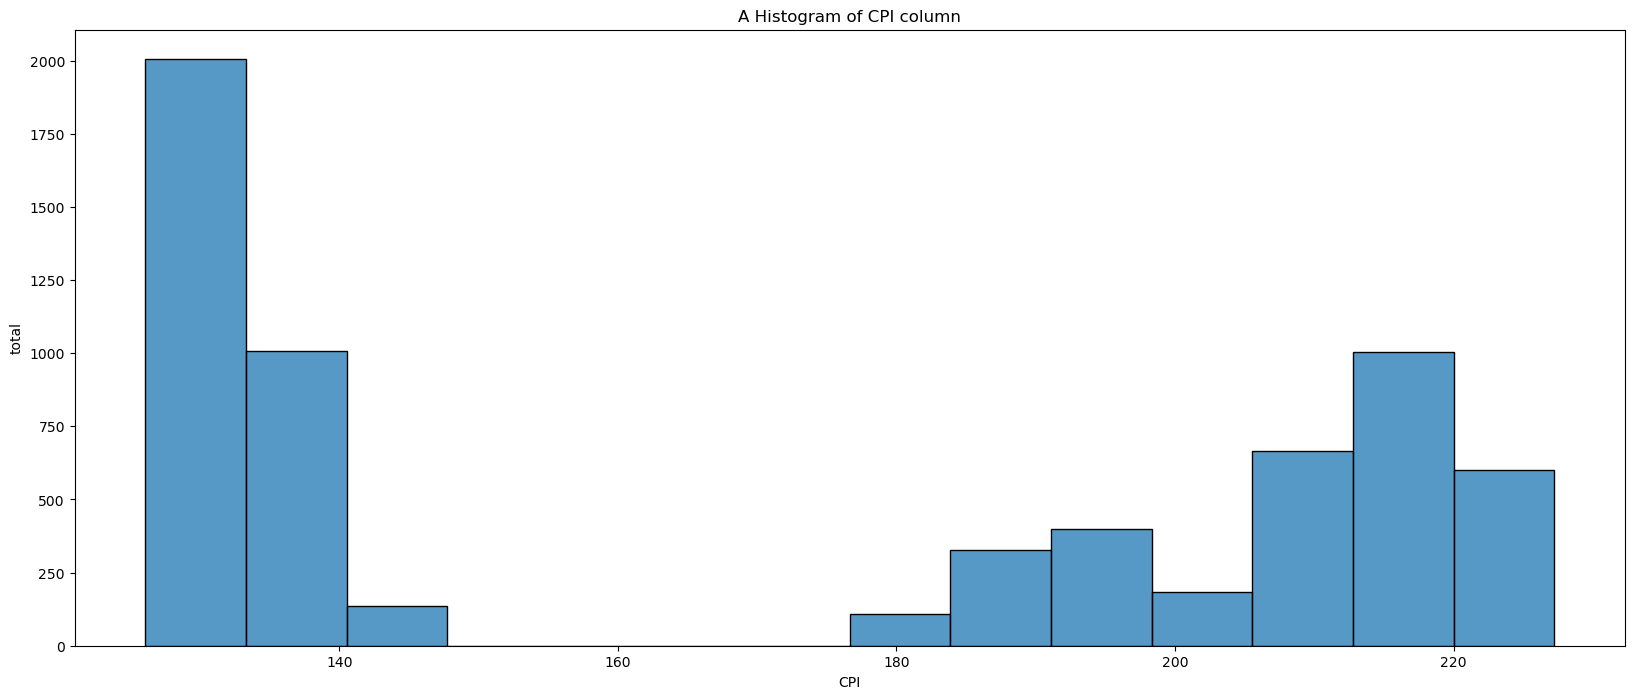

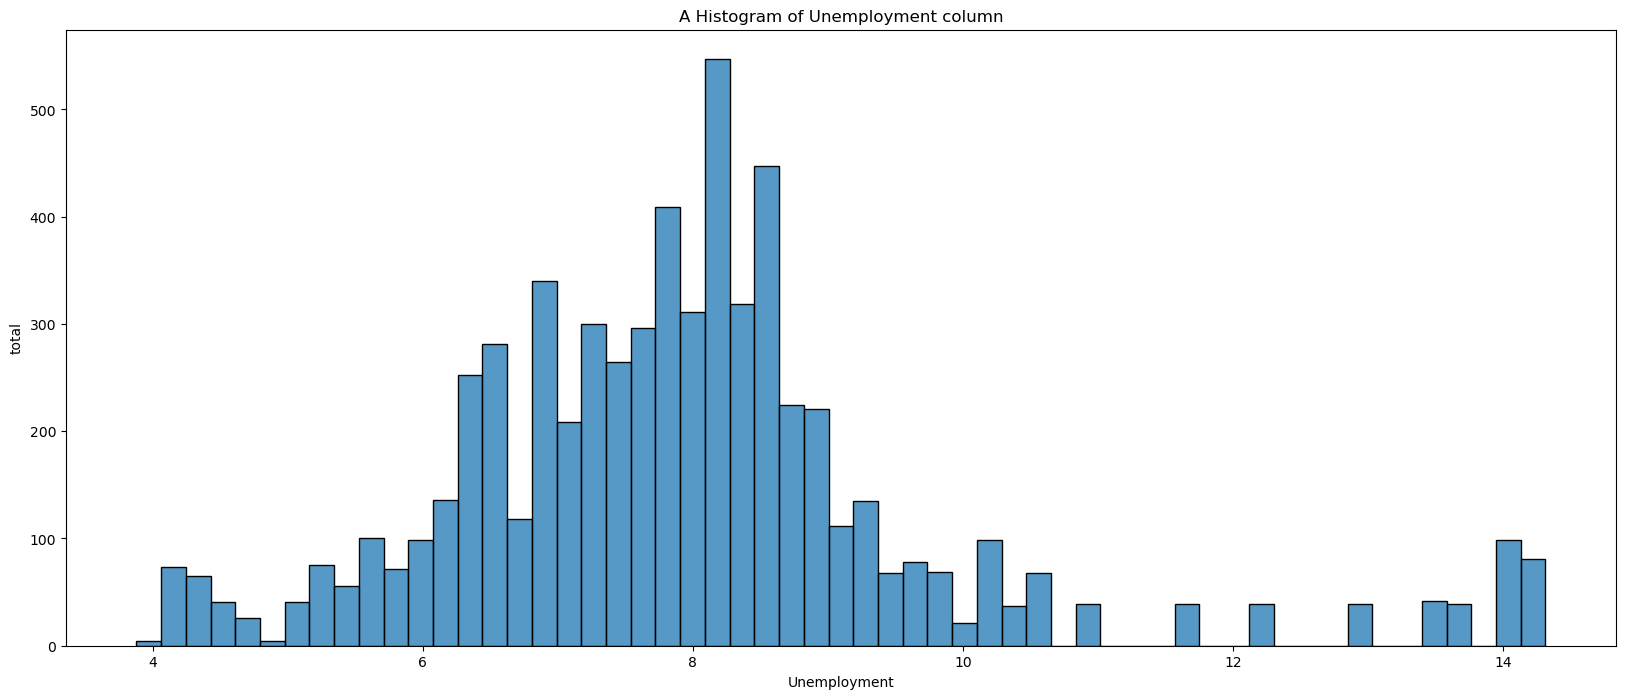

In [17]:
for column in df.columns :
    if column in ['Holiday_Flag','Date','Store'] :
        pass
    else :
        plots.histogram(column)

In [18]:
import datetime
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\pandas\core\tools\datetim

In [19]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

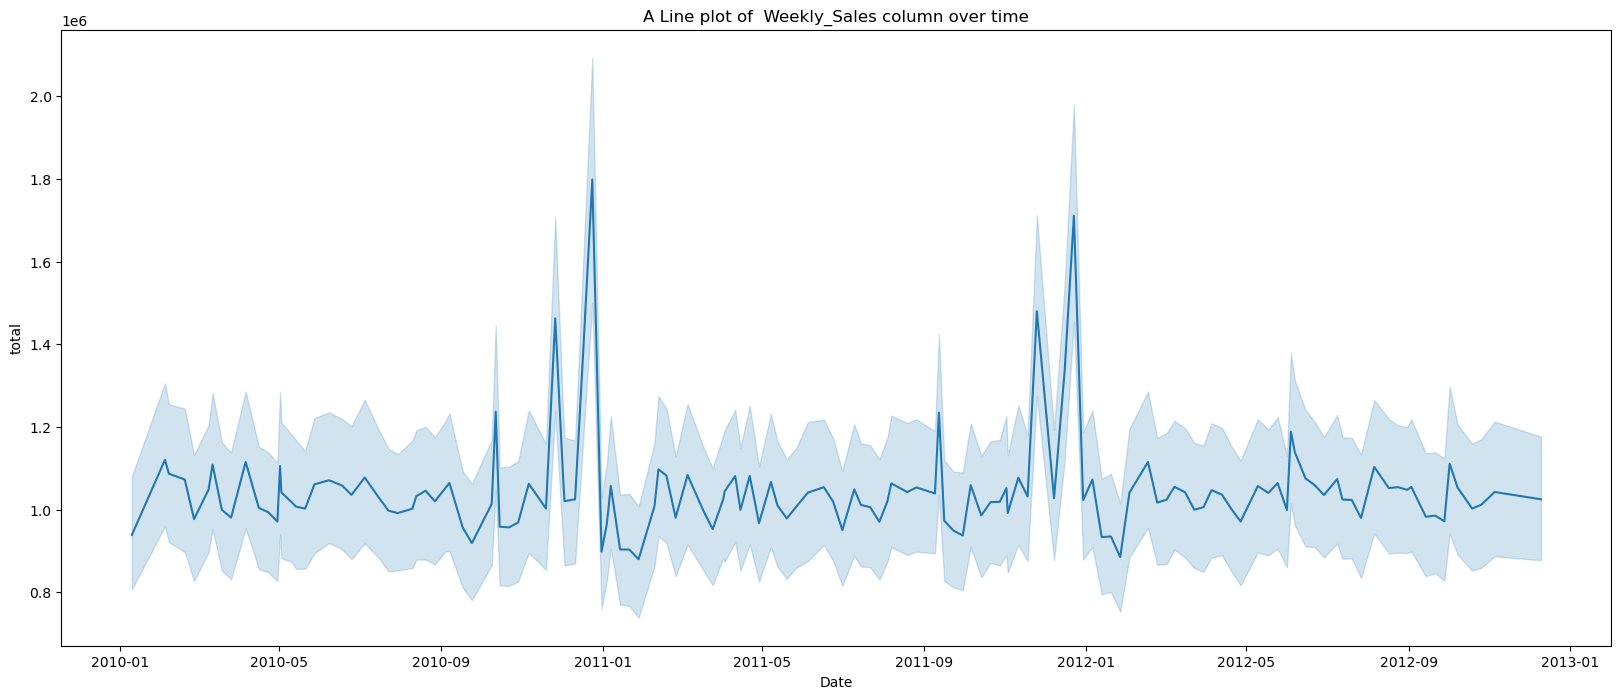

In [20]:
plots.line('Date','Weekly_Sales')
# Sales have had an almost constant rate ,with some spikes in january 2011 and january 2012

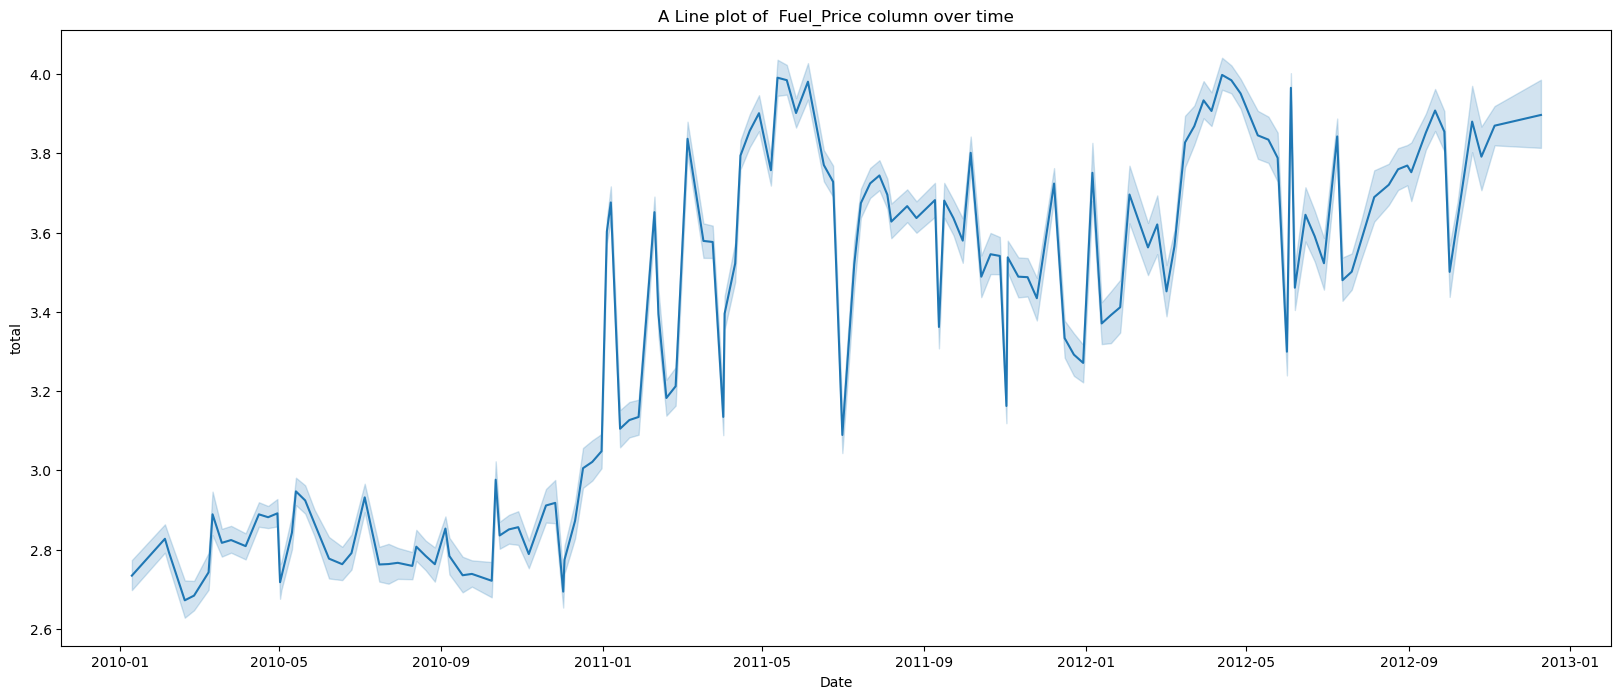

In [21]:
plots.line('Date','Fuel_Price')
# Fuel prices have been spikinig for the longest time ? Could they be affecting sales ??

<Figure size 2000x800 with 0 Axes>

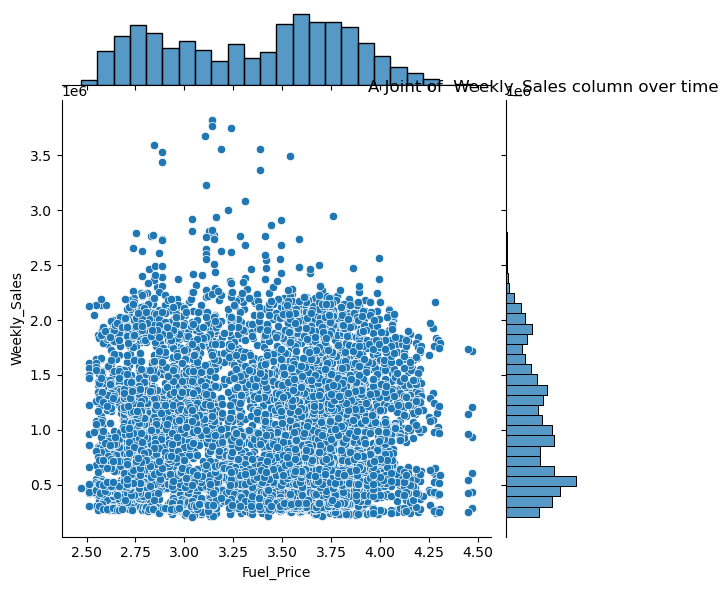

In [22]:
plots.joint('Fuel_Price','Weekly_Sales')

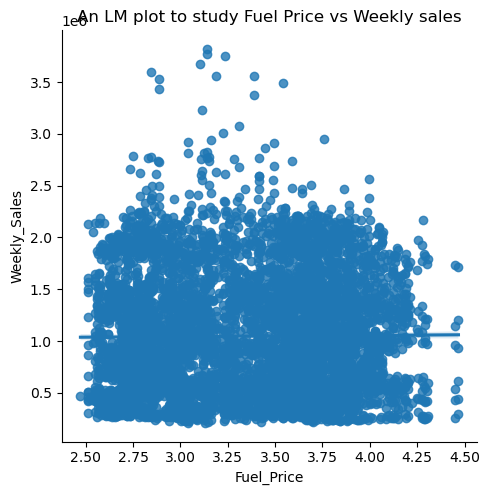

In [23]:
sns.lmplot(x='Fuel_Price',y='Weekly_Sales',data=df)
plt.title("An LM plot to study Fuel Price vs Weekly sales")
plt.show()
# The relationship is very weak ,because many data points are outside the line of best fit

<Figure size 2000x800 with 0 Axes>

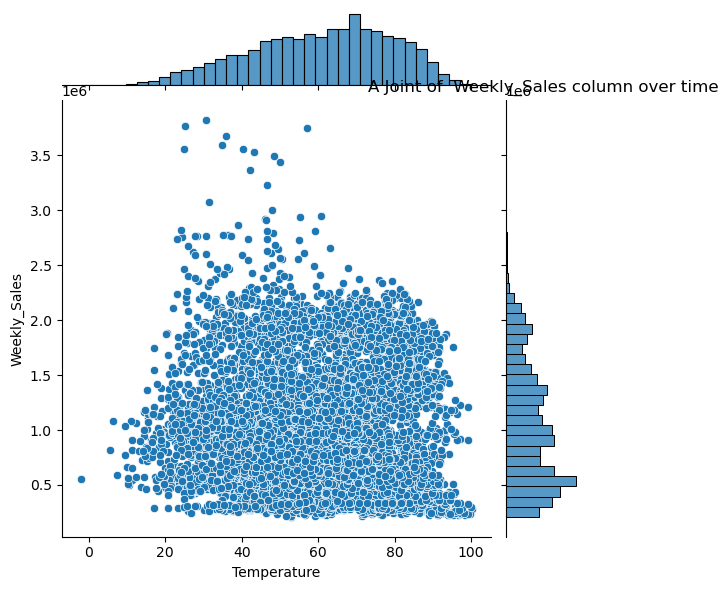

In [24]:
# How about Temperature ,does it affect sales\
plots.joint('Temperature','Weekly_Sales')

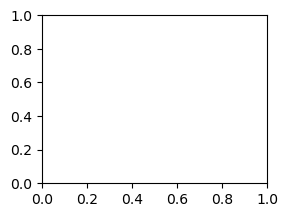

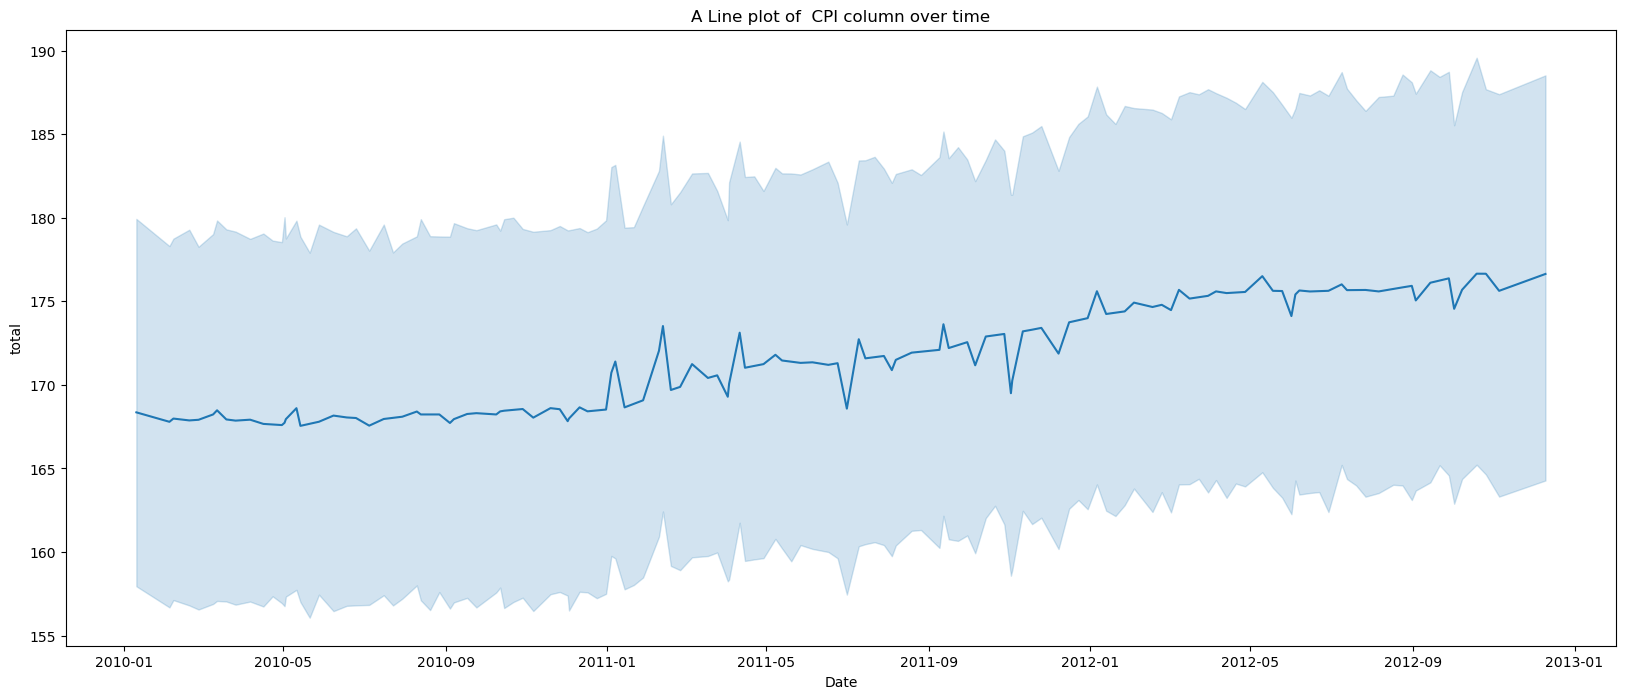

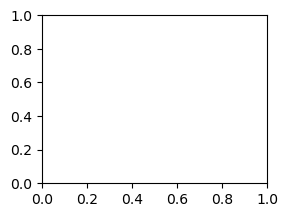

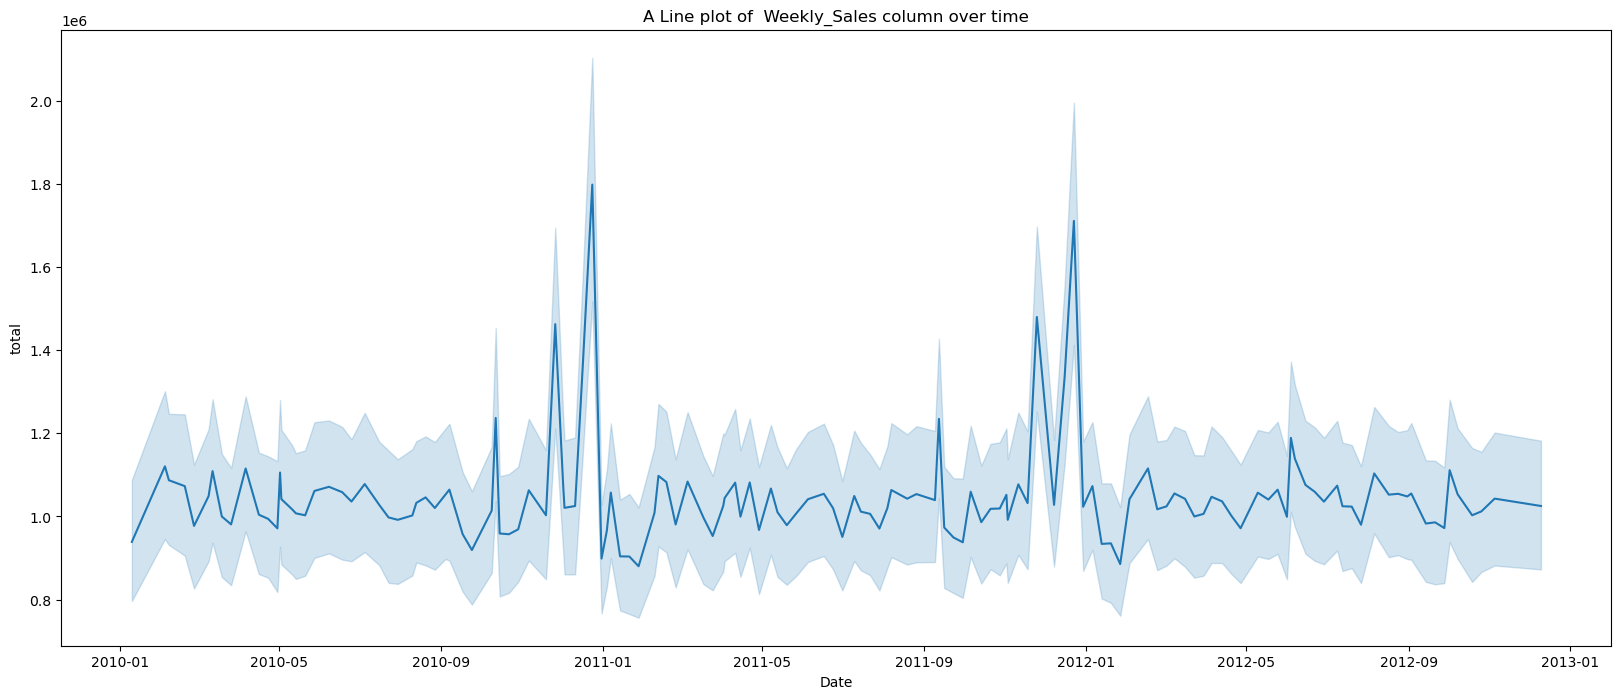

In [25]:
# CPI over time
plt.subplot(2,2,1)
plots.line('Date','CPI')
plt.subplot(2,2,2)
plots.line('Date','Weekly_Sales')
plt.show()
# There has been a constant increasing in the Consumer Price Index ,Sales have also been on the low dur

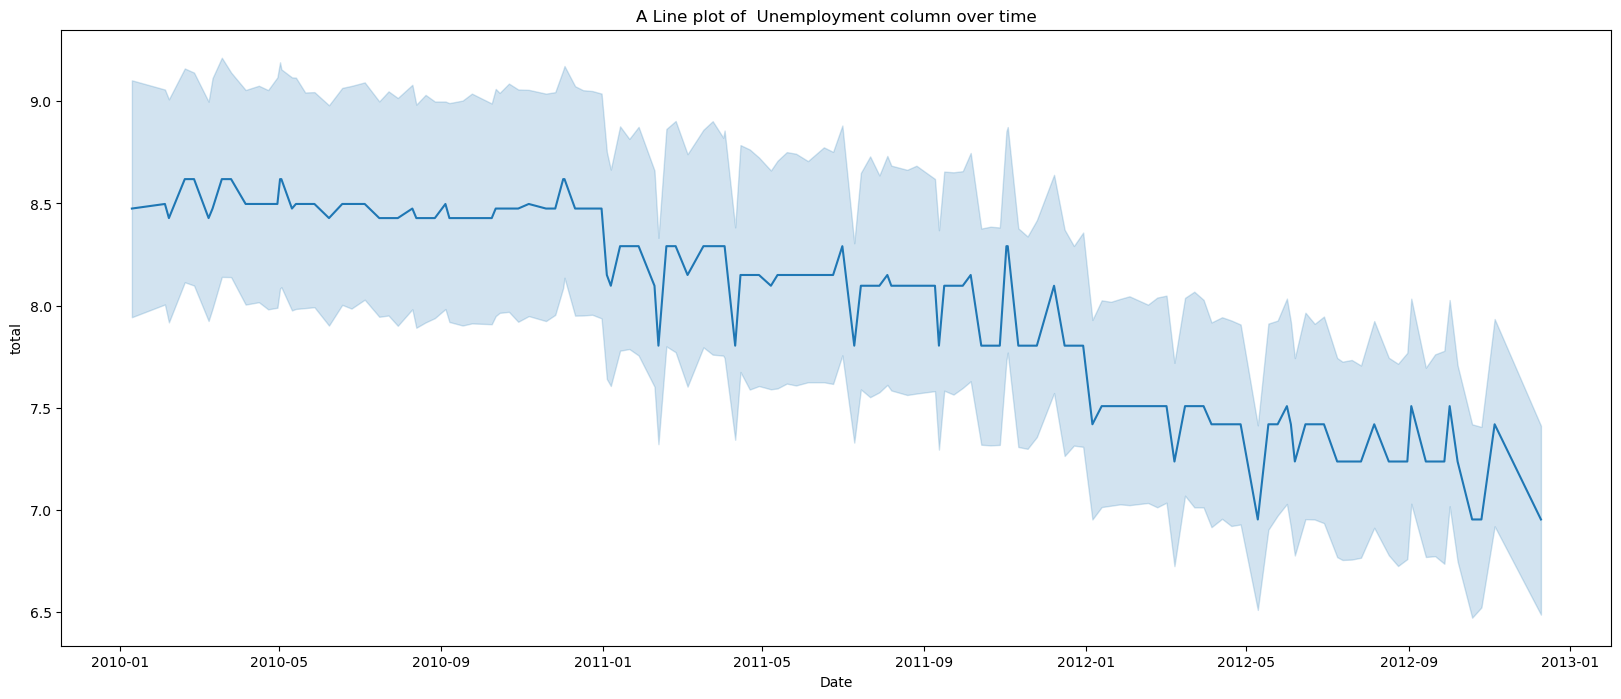

In [26]:
# Unwmployment over time
plots.line('Date','Unemployment')

In [27]:
#Seemingly all these factors affect the weekly sales in some way esp CPI and Fuel Prices ,Unemployment plays a Part 

In [28]:
# To try and investigate this : We can try to model Linear Regression or DecisionTree Regression

#  CASE IN POINT : RANDOM FOREST,DECISION TREE AND SVC + REGRESSION
THESE METHODS AIM TO TRY AND PREDICT THE OVERALL SALES GIVEN THE DIFFERENT FACTORS

In [29]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import classification_report

In [30]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [31]:
X = df.drop(['Store','Date','Weekly_Sales','Holiday_Flag'],axis=1)
y = df['Weekly_Sales']

In [32]:
X

,Temperature,Fuel_Price,CPI,Unemployment
0,42.31,2.572,211.096358,8.106
1,38.51,2.548,211.242170,8.106
2,39.93,2.514,211.289143,8.106
3,46.63,2.561,211.319643,8.106
4,46.50,2.625,211.350143,8.106
...,...,...,...,...
6430,64.88,3.997,192.013558,8.684
6431,64.89,3.985,192.170412,8.667
6432,54.47,4.000,192.327265,8.667
6433,56.47,3.969,192.330854,8.667


In [33]:
X

,Temperature,Fuel_Price,CPI,Unemployment
0,42.31,2.572,211.096358,8.106
1,38.51,2.548,211.242170,8.106
2,39.93,2.514,211.289143,8.106
3,46.63,2.561,211.319643,8.106
4,46.50,2.625,211.350143,8.106
...,...,...,...,...
6430,64.88,3.997,192.013558,8.684
6431,64.89,3.985,192.170412,8.667
6432,54.47,4.000,192.327265,8.667
6433,56.47,3.969,192.330854,8.667


In [34]:
scaler = MinMaxScaler(feature_range=(-1,1),copy=False)

In [35]:
X= scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1,1))

In [36]:
X.shape

(6435, 4)

In [37]:
y.shape

(6435, 1)

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [40]:
lr= LinearRegression()
lr.fit(X_train,y_train)
lr_predict = lr.predict(X_test)
print(mean_absolute_error(y_test,lr_predict))


0.2633513773701024


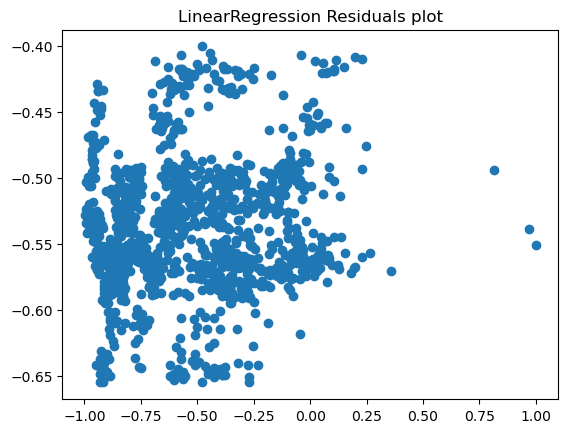

In [41]:
plt.scatter(y_test,lr_predict)
plt.title("LinearRegression Residuals plot")
plt.show()
# A clear indication of overfitting

In [42]:
dtr= DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr_predict = dtr.predict(X_test)
print(mean_absolute_error(y_test,dtr_predict))


0.23601684591941968


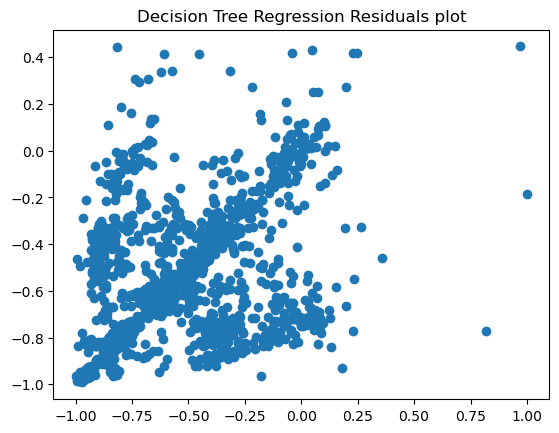

In [43]:
plt.scatter(y_test,dtr_predict)
plt.title("Decision Tree Regression Residuals plot")
plt.show()

In [44]:
rfr= RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_predict = rfr.predict(X_test)
print(mean_absolute_error(y_test,rfr_predict))


C:\Users\EDGAR MUYALE DAVIES\AppData\Local\Temp\ipykernel_10872\3133403939.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train,y_train)


0.21254716269889162


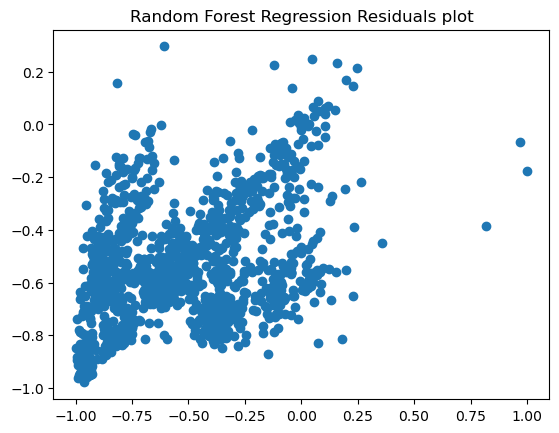

In [45]:
plt.scatter(y_test,rfr_predict)
plt.title("Random Forest Regression Residuals plot")
plt.show()

In [46]:
predicted_sales = scaler.inverse_transform(rfr_predict[:5].reshape(-1,1))
# RandomForestRegression Predictions
predicted_sales


array([[1151333.5353 ],
       [1308245.6234 ],
       [1026681.56384],
       [1020895.073  ],
       [ 642607.0701 ]])

In [47]:
predicted_sales = scaler.inverse_transform(lr_predict[:5].reshape(-1,1))
# Linear Regression Predictions
predicted_sales

array([[1082151.6641569 ],
       [1075674.91890366],
       [ 990580.30441786],
       [1129015.38860078],
       [ 973299.83377485]])

In [48]:
predicted_sales = scaler.inverse_transform(dtr_predict[:5].reshape(-1,1))
# Decision Tree Regression predictions
predicted_sales

array([[1092704.09],
       [1527455.19],
       [1399456.99],
       [1066478.1 ],
       [ 460020.74]])

In [49]:
# Random Forest Regressor perfomed the best folowed by Decision Tree Regression .Standard Linear Regression was outperformed by the latter

# DEEP LEARNING : NEURAL NETWORKS 

# A :::. LINEAR LAYER : WITH 3 LAYERS 

In [50]:
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [51]:
# Converting our values to tensor datatypes
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [52]:
X_train.shape

torch.Size([5148, 4])

In [53]:
y_train.shape

torch.Size([5148, 1])

In [54]:
class WallSales(nn.Module):
    def __init__(self,input_features=4,hidden_features=42,output_features=1,p=0.2):
        super(WallSales,self).__init__()
        self.linear_layer1 = nn.Linear(input_features,hidden_features)
        self.linear_layer2 = nn.Linear(hidden_features,hidden_features)
        self.fc =nn.Linear(hidden_features,output_features)
        self.dropout = nn.Dropout(p)
        torch.manual_seed(42)
        
    def forward(self,x: torch.Tensor):
        x = self.linear_layer1(x)
        x = F.relu(x)
        x = self.linear_layer2(x)
        x = self.dropout(x)
        x =self.fc(x)
        #x = x.detach().numpy()
        #x = scaler.inverse_transform(x)
        # for Training and testing loop :: commenting out the last two i.e x.detach and scaler.inverse_transform will work ;;
        # For the raw sales predictions ,uncommenting will work 
        return x

In [55]:
sales_lp = WallSales()

In [56]:
#help(salespredictor)

In [57]:
y_predicted = sales_lp.forward(X_train)
y_predicted

tensor([[ 0.1038],
        [-0.0446],
        [-0.1504],
        ...,
        [-0.0441],
        [-0.1092],
        [-0.0975]], grad_fn=<AddmmBackward0>)

In [58]:
# Selecting an optimizer and loss function :: For our case MSE is the best lossfn, I will use Adam optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(sales_lp.parameters(),lr=0.001)

In [59]:
# Training and Testing Loop
epochs  = 200
for epoch in range(epochs):
    y_pred = sales_lp.forward(X_train)
    loss = criterion(y_train,y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    with  torch.inference_mode():
        sales_lp.eval()
        y_pred = sales_lp.forward(X_test)
        test_loss = criterion(y_test,y_pred)
        if epoch % 10 == 0 :
            print(f"Epoch |||{epoch} and training_loss ::{loss} and the testing_loss is || {test_loss}")

Epoch |||0 and training_loss ::0.31290119886398315 and the testing_loss is || 0.273794561624527
Epoch |||10 and training_loss ::0.11817647516727448 and the testing_loss is || 0.11478852480649948
Epoch |||20 and training_loss ::0.10886617004871368 and the testing_loss is || 0.10962139070034027
Epoch |||30 and training_loss ::0.09730839729309082 and the testing_loss is || 0.09757766872644424
Epoch |||40 and training_loss ::0.09752977639436722 and the testing_loss is || 0.09719028323888779
Epoch |||50 and training_loss ::0.09473631531000137 and the testing_loss is || 0.09572486579418182
Epoch |||60 and training_loss ::0.09422352910041809 and the testing_loss is || 0.09554004669189453
Epoch |||70 and training_loss ::0.09362703561782837 and the testing_loss is || 0.0949477031826973
Epoch |||80 and training_loss ::0.09325581789016724 and the testing_loss is || 0.09485427290201187
Epoch |||90 and training_loss ::0.09300638735294342 and the testing_loss is || 0.09480614960193634
Epoch |||100 a

# B. DEEP LEARNING :::BACK PROPAGATION THROUGH TIME 

# 1 . RNN + GRU ( RECCURENT NEURAL NETWORKS + GATED RECURRENT UNITS)

In [60]:
sales = df[['Weekly_Sales']]

In [61]:
sales

,Weekly_Sales
0,-0.205418
1,-0.206378
2,-0.222999
3,-0.335084
4,-0.254679
...,...
6430,-0.721125
6431,-0.709885
6432,-0.709326
6433,-0.718381


In [62]:
sales = scaler.fit_transform(sales.values.reshape(-1,1))

In [63]:
sales

array([[-0.2054177 ],
       [-0.20637841],
       [-0.22299895],
       ...,
       [-0.70932575],
       [-0.71838099],
       [-0.69501751]])

In [64]:
def split_data(stock,lookback):
    data_raw = stock
    data = []
    for index in range(len(data_raw)-lookback):
        data.append(data_raw[index:index+lookback])
        data = np.array(data)
        test_set_size = int(np.round(0.2*data.shape[0]))
        train_set_size = int(np.round(data.shape[0]-(test_set_size)))
        x_train = data[:train_set_size,:-1,:]
        y_train = data[:train_set_size,:-1,:]
        x_test = data[:test_set_size:,:-1]
        y_test = data[:test_set_size:,:-1]
        return [x_train,y_train,x_test,y_test]


lookback = 65
x_train,y_train,x_test,y_test = split_data(sales,lookback)

# Now I will convert everything into tensors
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)
print(x_train.shape[0])
print(y_train.shape[0])
input_size = 1
hidden_size = 28
num_layers = 2
num_classes = 1


1
1


# 1. RECURRENT NEURAL NETWORKS :: RNN

In [65]:
class RNN(nn.Module):
    def __init__(self,input_size=input_size,hidden_size=hidden_size,num_layers=num_layers,num_classes=num_classes,sequence_length=1):
        super(RNN,self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size,hidden_size,num_layers)
        self.fc = nn.Linear(hidden_size*sequence_length,num_classes)
        #self.dropout = nn.Dropout(p)
    def forward(self,x) :
        h0 = torch.zeros(self.num_layers,x.size(1),self.hidden_size).requires_grad_()
        out,h0 = self.rnn(x,(h0.detach()))
        #out = out.reshape(out.shape[0],-1)
        out = self.fc(out)
        #out =self.fc(out)
        return out

In [66]:
rnn = RNN()
rnn.forward(x_train)

tensor([[[-0.0202],
         [-0.0202],
         [-0.0197],
         [-0.0167],
         [-0.0189],
         [-0.0171],
         [-0.0176],
         [-0.0166],
         [-0.0195],
         [-0.0187],
         [-0.0175],
         [-0.0164],
         [-0.0169],
         [-0.0196],
         [-0.0180],
         [-0.0166],
         [-0.0170],
         [-0.0198],
         [-0.0187],
         [-0.0181],
         [-0.0169],
         [-0.0179],
         [-0.0187],
         [-0.0173],
         [-0.0163],
         [-0.0161],
         [-0.0196],
         [-0.0182],
         [-0.0182],
         [-0.0173],
         [-0.0187],
         [-0.0182],
         [-0.0170],
         [-0.0158],
         [-0.0174],
         [-0.0182],
         [-0.0174],
         [-0.0157],
         [-0.0163],
         [-0.0188],
         [-0.0180],
         [-0.0178],
         [-0.0248],
         [-0.0188],
         [-0.0208],
         [-0.0239],
         [-0.0312],
         [-0.0161],
         [-0.0172],
         [-0.0164],


In [67]:
optimizer_1 = torch.optim.Adam(rnn.parameters(),lr=0.001)
epochs  = 40
for epoch in range(epochs):
    y_pred_train = rnn(x_train)
    loss = criterion(y_train,y_pred_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch{epoch}|loss{loss}")

Epoch0|loss0.07169988751411438
Epoch1|loss0.07169988751411438
Epoch2|loss0.07169988751411438
Epoch3|loss0.07169988751411438
Epoch4|loss0.07169988751411438
Epoch5|loss0.07169988751411438
Epoch6|loss0.07169988751411438
Epoch7|loss0.07169988751411438
Epoch8|loss0.07169988751411438
Epoch9|loss0.07169988751411438
Epoch10|loss0.07169988751411438
Epoch11|loss0.07169988751411438
Epoch12|loss0.07169988751411438
Epoch13|loss0.07169988751411438
Epoch14|loss0.07169988751411438
Epoch15|loss0.07169988751411438
Epoch16|loss0.07169988751411438
Epoch17|loss0.07169988751411438
Epoch18|loss0.07169988751411438
Epoch19|loss0.07169988751411438
Epoch20|loss0.07169988751411438
Epoch21|loss0.07169988751411438
Epoch22|loss0.07169988751411438
Epoch23|loss0.07169988751411438
Epoch24|loss0.07169988751411438
Epoch25|loss0.07169988751411438
Epoch26|loss0.07169988751411438
Epoch27|loss0.07169988751411438
Epoch28|loss0.07169988751411438
Epoch29|loss0.07169988751411438
Epoch30|loss0.07169988751411438
Epoch31|loss0.0716

# 2 . GATED RECURRENT UNIT ::

In [68]:
class GRU(nn.Module):
    def __init__(self,input_size=input_size,hidden_size=hidden_size,num_layers=num_layers,num_classes=num_classes,sequence_length=1):
        super(GRU,self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size,hidden_size,num_layers)
        self.fc = nn.Linear(hidden_size*sequence_length,num_classes)
        #self.dropout = nn.Dropout(p)
    def forward(self,x) :
        h0 = torch.zeros(self.num_layers,x.size(1),self.hidden_size).requires_grad_()
        out,h0 = self.gru(x,(h0.detach()))
        out = self.fc(out)
        return out

In [69]:
gru_model = GRU()

In [70]:
optimizer_1 = torch.optim.Adam(gru_model.parameters(),lr=0.001)
epochs  = 40
for epoch in range(epochs):
    y_pred_train = gru_model(x_train)
    loss = criterion(y_train,y_pred_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch{epoch}|loss{loss}")

Epoch0|loss0.03352661803364754
Epoch1|loss0.03352661803364754
Epoch2|loss0.03352661803364754
Epoch3|loss0.03352661803364754
Epoch4|loss0.03352661803364754
Epoch5|loss0.03352661803364754
Epoch6|loss0.03352661803364754
Epoch7|loss0.03352661803364754
Epoch8|loss0.03352661803364754
Epoch9|loss0.03352661803364754
Epoch10|loss0.03352661803364754
Epoch11|loss0.03352661803364754
Epoch12|loss0.03352661803364754
Epoch13|loss0.03352661803364754
Epoch14|loss0.03352661803364754
Epoch15|loss0.03352661803364754
Epoch16|loss0.03352661803364754
Epoch17|loss0.03352661803364754
Epoch18|loss0.03352661803364754
Epoch19|loss0.03352661803364754
Epoch20|loss0.03352661803364754
Epoch21|loss0.03352661803364754
Epoch22|loss0.03352661803364754
Epoch23|loss0.03352661803364754
Epoch24|loss0.03352661803364754
Epoch25|loss0.03352661803364754
Epoch26|loss0.03352661803364754
Epoch27|loss0.03352661803364754
Epoch28|loss0.03352661803364754
Epoch29|loss0.03352661803364754
Epoch30|loss0.03352661803364754
Epoch31|loss0.0335

In [71]:
with torch.inference_mode():
    predictions = gru_model.forward(x_train)
    print(predictions)

tensor([[[-0.1089],
         [-0.1089],
         [-0.1091],
         [-0.1102],
         [-0.1094],
         [-0.1100],
         [-0.1098],
         [-0.1102],
         [-0.1092],
         [-0.1094],
         [-0.1099],
         [-0.1103],
         [-0.1101],
         [-0.1091],
         [-0.1097],
         [-0.1102],
         [-0.1101],
         [-0.1091],
         [-0.1095],
         [-0.1097],
         [-0.1101],
         [-0.1097],
         [-0.1094],
         [-0.1100],
         [-0.1103],
         [-0.1104],
         [-0.1091],
         [-0.1096],
         [-0.1096],
         [-0.1100],
         [-0.1095],
         [-0.1096],
         [-0.1101],
         [-0.1105],
         [-0.1099],
         [-0.1096],
         [-0.1099],
         [-0.1105],
         [-0.1103],
         [-0.1094],
         [-0.1097],
         [-0.1098],
         [-0.1072],
         [-0.1094],
         [-0.1087],
         [-0.1075],
         [-0.1048],
         [-0.1104],
         [-0.1100],
         [-0.1103],


# 3. LONG SHORT TERM NETWORKS( LSTM :::)

In [72]:
class LSTM(nn.Module):
    def __init__(self,input_size=input_size,hidden_size=hidden_size,num_layers=num_layers,num_classes=num_classes,seq_length=1):
        super(LSTM,self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size,hidden_size,num_layers)
        self.fc = nn.Linear(hidden_size*seq_length,num_classes)
        torch.manual_seed(42)
    def forward(self,x) :
        h0 = torch.zeros(self.num_layers,x.size(1),self.hidden_size).requires_grad_()
        c0 = torch.zeros(self.num_layers,x.size(1),self.hidden_size).requires_grad_()
        out,(hn,cn) = self.lstm(x,(h0.detach(),c0.detach()))
        #out = out.reshape(out.size(0),-1)
        out =self.fc(out)
        return out

In [73]:
lstm = LSTM()

In [74]:
lstm_predictions = lstm.forward(x_train)

In [75]:
print(lstm_predictions)

tensor([[[0.1241],
         [0.1241],
         [0.1241],
         [0.1242],
         [0.1241],
         [0.1242],
         [0.1242],
         [0.1242],
         [0.1241],
         [0.1241],
         [0.1242],
         [0.1242],
         [0.1242],
         [0.1241],
         [0.1241],
         [0.1242],
         [0.1242],
         [0.1241],
         [0.1241],
         [0.1241],
         [0.1242],
         [0.1241],
         [0.1241],
         [0.1242],
         [0.1242],
         [0.1242],
         [0.1241],
         [0.1241],
         [0.1241],
         [0.1242],
         [0.1241],
         [0.1241],
         [0.1242],
         [0.1242],
         [0.1242],
         [0.1241],
         [0.1242],
         [0.1242],
         [0.1242],
         [0.1241],
         [0.1241],
         [0.1241],
         [0.1240],
         [0.1241],
         [0.1241],
         [0.1240],
         [0.1238],
         [0.1242],
         [0.1242],
         [0.1242],
         [0.1242],
         [0.1242],
         [0.

In [76]:
optimizer_1 = torch.optim.Adam(lstm.parameters(),lr=0.001)
epochs  = 40
for epoch in range(epochs):
    y_pred_train = lstm(x_train)
    loss = criterion(y_train,y_pred_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch{epoch}|loss{loss}")

Epoch0|loss0.16343963146209717
Epoch1|loss0.16343963146209717
Epoch2|loss0.16343963146209717
Epoch3|loss0.16343963146209717
Epoch4|loss0.16343963146209717
Epoch5|loss0.16343963146209717
Epoch6|loss0.16343963146209717
Epoch7|loss0.16343963146209717
Epoch8|loss0.16343963146209717
Epoch9|loss0.16343963146209717
Epoch10|loss0.16343963146209717
Epoch11|loss0.16343963146209717
Epoch12|loss0.16343963146209717
Epoch13|loss0.16343963146209717
Epoch14|loss0.16343963146209717
Epoch15|loss0.16343963146209717
Epoch16|loss0.16343963146209717
Epoch17|loss0.16343963146209717
Epoch18|loss0.16343963146209717
Epoch19|loss0.16343963146209717
Epoch20|loss0.16343963146209717
Epoch21|loss0.16343963146209717
Epoch22|loss0.16343963146209717
Epoch23|loss0.16343963146209717
Epoch24|loss0.16343963146209717
Epoch25|loss0.16343963146209717
Epoch26|loss0.16343963146209717
Epoch27|loss0.16343963146209717
Epoch28|loss0.16343963146209717
Epoch29|loss0.16343963146209717
Epoch30|loss0.16343963146209717
Epoch31|loss0.1634

THE FACT THAT MY MODELS HAVE AN ALMOST CONSTANT LOSS IS BECAUSE MY MODELS ARE BUILT TO TACKLE THE PROBLEM OF VANISHING GRADIENTS .
 THIS WAS A GREAT PROJECT AS I HAD THE CHANCE TO LEARN ABOUT GRU AND RNN AND I EXPLORED THE VANISHING GRADIENTS PROBLEM
 I AM HAPPY TO HAVE ACHIEVED THE OBJECTIVES OF THE PROJECT

# THE END :: THANK YOU 